In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopy
from geopy.geocoders import MapBox
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import numpy as np
from scipy.stats import linregress


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 13.7 MB/s eta 0:00:00


In [5]:
# Load the data from CSV file
data = pd.read_csv("/content/drive/MyDrive/dataset/1351302712201451_IHME_1990_2019_DATA_Y2022M012D21.csv")
data.head()

location_id location_name  year_id  age_group_id    age_group_name  \
0            6         China     1990            27  Age-standardized   
1            6         China     1990            27  Age-standardized   
2            6         China     1990            27  Age-standardized   
3            6         China     1990            27  Age-standardized   
4            6         China     1990            27  Age-standardized   

  haq_index_age_type  indicator_id                indicator_name  \
0            Overall           100                     HAQ Index   
1            Overall           297                  Tuberculosis   
2            Overall           302            Diarrheal diseases   
3            Overall           322  Lower respiratory infections   
4            Overall           328  Upper respiratory infections   

                               measure        val      upper      lower  
0                                Index  35.033943  38.778109  31.591303  
1  Mortality-to-incidence ratios (MIR)   0.151080   0.179177   0.126658  
2  Mortality-to-incidence ratios (MIR)   0.000377   0.000491   0.000291  
3  Risk-standardised death rates (RSD)   0.000904   0.001042   0.000768  
4  Risk-standardised death rates (RSD)   0.000019   0.000032   0.000002

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45288 entries, 0 to 45287
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location_id         45288 non-null  int64  
 1   location_name       45288 non-null  object 
 2   year_id             45288 non-null  int64  
 3   age_group_id        45288 non-null  int64  
 4   age_group_name      45288 non-null  object 
 5   haq_index_age_type  45288 non-null  object 
 6   indicator_id        45288 non-null  int64  
 7   indicator_name      45288 non-null  object 
 8   measure             45288 non-null  object 
 9   val                 45288 non-null  float64
 10  upper               45288 non-null  float64
 11  lower               45288 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.1+ MB


## Data Cleaning

In [6]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Check for duplicates
print(data.duplicated().sum())

# Drop duplicates
data = data.drop_duplicates()

# Check data types
print(data.dtypes)

location_id           0
location_name         0
year_id               0
age_group_id          0
age_group_name        0
haq_index_age_type    0
indicator_id          0
indicator_name        0
measure               0
val                   0
upper                 0
lower                 0
dtype: int64
0
location_id             int64
location_name          object
year_id                 int64
age_group_id            int64
age_group_name         object
haq_index_age_type     object
indicator_id            int64
indicator_name         object
measure                object
val                   float64
upper                 float64
lower                 float64
dtype: object


In [7]:
# Display distinct values for each column
print("Distinct Values for 'location_name':")
print(data['location_name'].unique())

print("\nDistinct Values for 'year_id':")
print(data['year_id'].unique())

print("\nDistinct Values for 'age_group_id':")
print(data['age_group_id'].unique())

print("\nDistinct Values for 'age_group_name':")
print(data['age_group_name'].unique())

print("\nDistinct Values for 'haq_index_age_type':")
print(data['haq_index_age_type'].unique())

print("\nDistinct Values for 'indicator_id':")
print(data['indicator_id'].unique())

print("\nDistinct Values for 'indicator_name':")
print(data['indicator_name'].unique())

print("\nDistinct Values for 'measure':")
print(data['measure'].unique())


Distinct Values for 'location_name':
['China' "Democratic People's Republic of Korea"
 'Taiwan (Province of China)' 'Cambodia' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Maldives' 'Myanmar'
 'Philippines' 'Sri Lanka' 'Thailand' 'Timor-Leste' 'Viet Nam' 'Fiji'
 'Kiribati' 'Marshall Islands' 'Micronesia (Federated States of)'
 'Papua New Guinea' 'Samoa' 'Solomon Islands' 'Tonga' 'Vanuatu' 'Armenia'
 'Azerbaijan' 'Georgia' 'Kazakhstan' 'Kyrgyzstan' 'Mongolia' 'Tajikistan'
 'Turkmenistan' 'Uzbekistan' 'Albania' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Czechia' 'Hungary' 'North Macedonia' 'Montenegro' 'Poland'
 'Romania' 'Serbia' 'Slovakia' 'Slovenia' 'Belarus' 'Estonia' 'Latvia'
 'Lithuania' 'Republic of Moldova' 'Russian Federation' 'Ukraine'
 'Brunei Darussalam' 'Japan' 'Republic of Korea' 'Singapore' 'Australia'
 'New Zealand' 'Andorra' 'Austria' 'Belgium' 'Cyprus' 'Denmark' 'Finland'
 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Luxembourg'

In [8]:
data.describe()

location_id      year_id  age_group_id  indicator_id           val  \
count  45288.000000  45288.00000  45288.000000  45288.000000  45288.000000   
mean     136.299020   2004.50000    116.036036    464.279279      1.911781   
std       97.922687     14.50016     91.462214    137.811429      9.993962   
min        6.000000   1990.00000     27.000000    100.000000      0.000000   
25%       62.750000   1990.00000     27.000000    341.000000      0.000013   
50%      122.500000   2004.50000     39.000000    487.000000      0.000293   
75%      182.250000   2019.00000    200.000000    531.000000      0.169254   
max      522.000000   2019.00000    232.000000    849.000000     96.749303   

              upper         lower  
count  45288.000000  45288.000000  
mean       2.066490      1.769025  
std       10.543456      9.461406  
min        0.000000      0.000000  
25%        0.000020      0.000008  
50%        0.000417      0.000191  
75%        0.234474      0.113423  
max       98.560506     95.181004

In [9]:
# Pivot the melted data to have each indicator as a separate column for each value type
pivoted_data = data.pivot_table(index=[ 'location_name', 'year_id'],
                                       columns='indicator_name', values='val',
                                aggfunc='mean').reset_index()


In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert the dictionary to a DataFrame
df = pivoted_data

# Get the list of indicators
indicators = df.columns[2:]  # Assuming the indicators start from the 3rd column

# Define the number of rows and columns in the grid
num_rows = len(indicators)
num_cols = 2  # Two columns for two years

# Create subplots
fig = make_subplots(rows=num_rows, cols=num_cols,
                    subplot_titles=[f'{indicator} ({year})' for indicator in indicators for year in df['year_id'].unique()],
                    specs=[[{'type': 'choropleth'}]*num_cols]*num_rows)

# Loop through each indicator and create the maps
for i, indicator in enumerate(indicators, start=1):
    for j, year in enumerate(df['year_id'].unique(), start=1):
        data_year = df[df['year_id'] == year]
        fig.add_trace(go.Choropleth(locations=data_year['location_name'],
                                     locationmode='country names',
                                     z=data_year[indicator],
                                     colorbar=dict(title='Value')),  # Enable color scale legend
                      row=i, col=j)

    # Update layout for each row
    fig.update_xaxes(title_text='Location', row=i, col=1)
    fig.update_xaxes(title_text='Location', row=i, col=2)
    fig.update_yaxes(title_text='Value', row=i, col=1)
    fig.update_yaxes(title_text='Value', row=i, col=2)

# Update layout
fig.update_layout(title_text="Comparison of Indicators Across Two Years",
                  height=num_rows * 400,  # Increase height to accommodate larger subplots
                  width=1000,  # Keep width constant
                  coloraxis_colorbar=dict(title='Value', x=0.5, xanchor='center', y=1.05, yanchor='bottom'),
                  coloraxis=dict(colorscale='Blues'))  # Adjust color scale to go from light to dark

# Show the plot
fig.show()


In [11]:
# Pivot the melted data to have each indicator as a separate column for each value type
pivoted_data1 = data.pivot_table(index=['location_name', 'year_id'],
                                       columns='measure', values='val',
                                aggfunc='mean').reset_index()

columns_to_standardize = ['Index', 'Mortality-to-incidence ratios (MIR)', 'Risk-standardised death rates (RSD)']

for column in columns_to_standardize:
    minimum = pivoted_data1[column].min()
    maximum = pivoted_data1[column].max()
    pivoted_data1[column + '_standardized'] = (pivoted_data1[column] - minimum) / (maximum-minimum)

df = pivoted_data1

In [12]:
# Initialize the geocoder with your Mapbox access token
geolocator = MapBox(api_key='pk.eyJ1IjoiZ2FyZzA2MDYwMCIsImEiOiJjbHZta3g1OGgwMjdsMm1tZ2JzNWN3em5xIn0.YLhUJ_9qI8_nxLLcwo4zaQ')

# Geocode the country names to obtain latitude and longitude coordinates
def geocode_country(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Add latitude and longitude columns to the DataFrame
df['latitude'], df['longitude'] = zip(*df['location_name'].apply(geocode_country))

In [13]:
# Get the list of indicators
indicators = df.columns[5:8]  # Assuming the indicators start from the 3rd column

# Define the number of rows and columns in the grid
num_rows = len(indicators)
num_cols = 2  # Two columns for two years

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=num_rows, cols=num_cols,
                    subplot_titles=[f'{indicator} ({year})' for indicator in indicators for year in df['year_id'].unique()],
                    specs=[[{'type': 'scattergeo'}]*num_cols]*num_rows)

# Loop through each indicator and create the maps
for i, indicator in enumerate(indicators, start=1):
    for j, year in enumerate(df['year_id'].unique(), start=1):
        data_year = df[df['year_id'] == year]
        data_year = data_year.dropna(subset=[indicator])  # Remove rows with NaN values

        # Define color scale using the minimum and maximum values of the indicator
        color_scale = px.colors.diverging.RdYlBu

        fig.add_trace(go.Scattergeo(
            lon=data_year['longitude'],
            lat=data_year['latitude'],
            mode='markers',
            marker=dict(
                size=data_year[indicator] * 20,  # Adjust the size of the bubbles
                color=data_year[indicator],      # Use the indicator values for coloring
                colorscale=color_scale,
                opacity=0.8,
                sizemode='diameter',
                cmin=data_year[indicator].min(),  # Adjust the range of the color scale
                cmax=data_year[indicator].max()   # Adjust the range of the color scale
            ),
            name=str(year)
        ),
                      row=i, col=j)

    # Update layout for each row
    fig.update_xaxes(title_text='Longitude', row=i, col=1)  # Update the axis titles
    fig.update_xaxes(title_text='Longitude', row=i, col=2)
    fig.update_yaxes(title_text='Latitude', row=i, col=1)
    fig.update_yaxes(title_text='Latitude', row=i, col=2)

# Create a color bar trace for each indicator
colorbar_traces = []
for indicator in indicators:
    colorbar_traces.append(go.Scattergeo(
        visible=False,  # Initially hidden
        mode='markers',
        marker=dict(
            size=1,
            color=df[indicator],
            colorscale=color_scale,
            colorbar=dict(title=f"{indicator} Value")
        )
    ))

# Add color bar traces to the figure
for trace in colorbar_traces:
    fig.add_trace(trace)

# Update layout
fig.update_layout(title_text="Comparison of Indicators Across Two Years",
                  height=num_rows * 400,  # Increase height to accommodate larger subplots
                  width=1000)  # Keep width constant

# Show the plot
fig.show()


In [15]:
# Pivot the melted data to have each indicator as a separate column for each value type
pivoted_data2 = data.pivot_table(index=['location_name', 'year_id','age_group_name'],
                                       columns='indicator_name', values='val',
                                aggfunc='mean').reset_index()


<ipython-input-16-300733d235d4>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-300733d235d4>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-300733d235d4>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-300733d235d4>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-300733d235d4>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

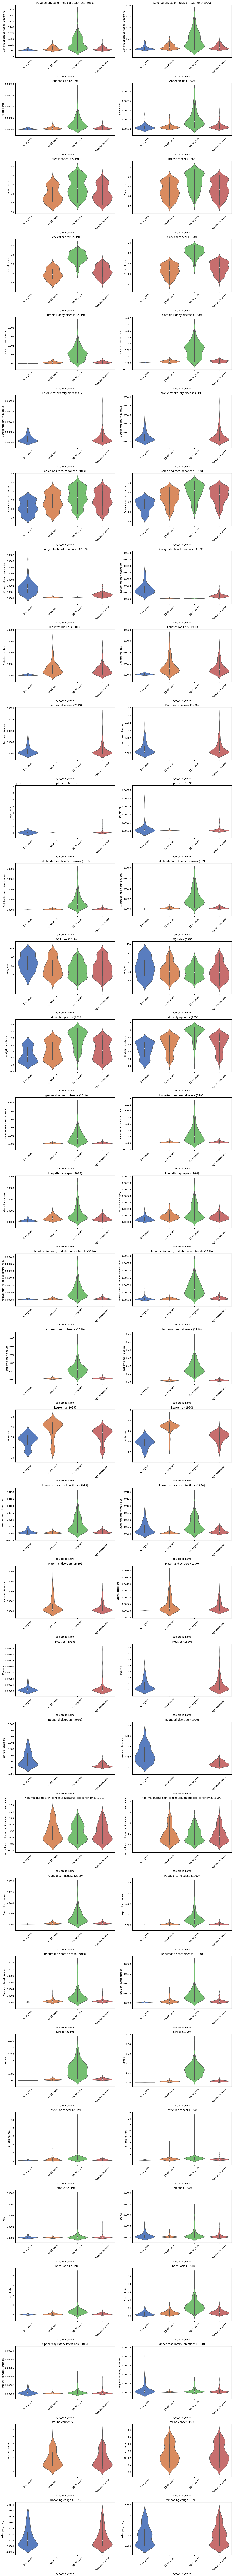

In [16]:
# Define the indicators to plot
indicators_to_plot = pivoted_data2.columns[3:]  # Exclude 'year_id' and 'age_group_name'

# Create subplots with two columns and a number of rows based on the number of indicators
num_rows = len(indicators_to_plot)
num_cols = 2

# Set the figure size
plt.figure(figsize=(15, 5*num_rows))

# Iterate over each indicator
for i, indicator in enumerate(indicators_to_plot, start=1):
    # Create the subplot for the current indicator and the year 2019
    plt.subplot(num_rows, num_cols, 2*i-1)
    sns.violinplot(x='age_group_name', y=indicator, data=pivoted_data2[pivoted_data2['year_id'] == 2019], palette='muted')
    plt.title(f'{indicator} (2019)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Create the subplot for the current indicator and the year 1990
    plt.subplot(num_rows, num_cols, 2*i)
    sns.violinplot(x='age_group_name', y=indicator, data=pivoted_data2[pivoted_data2['year_id'] == 1990], palette='muted')
    plt.title(f'{indicator} (1990)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [17]:
# Pivot the melted data to have each indicator as a separate column for each value type
pivoted_data3 = data.pivot_table(index=['location_name', 'year_id'],
                                       columns='measure', values='val',
                                aggfunc='mean').reset_index()

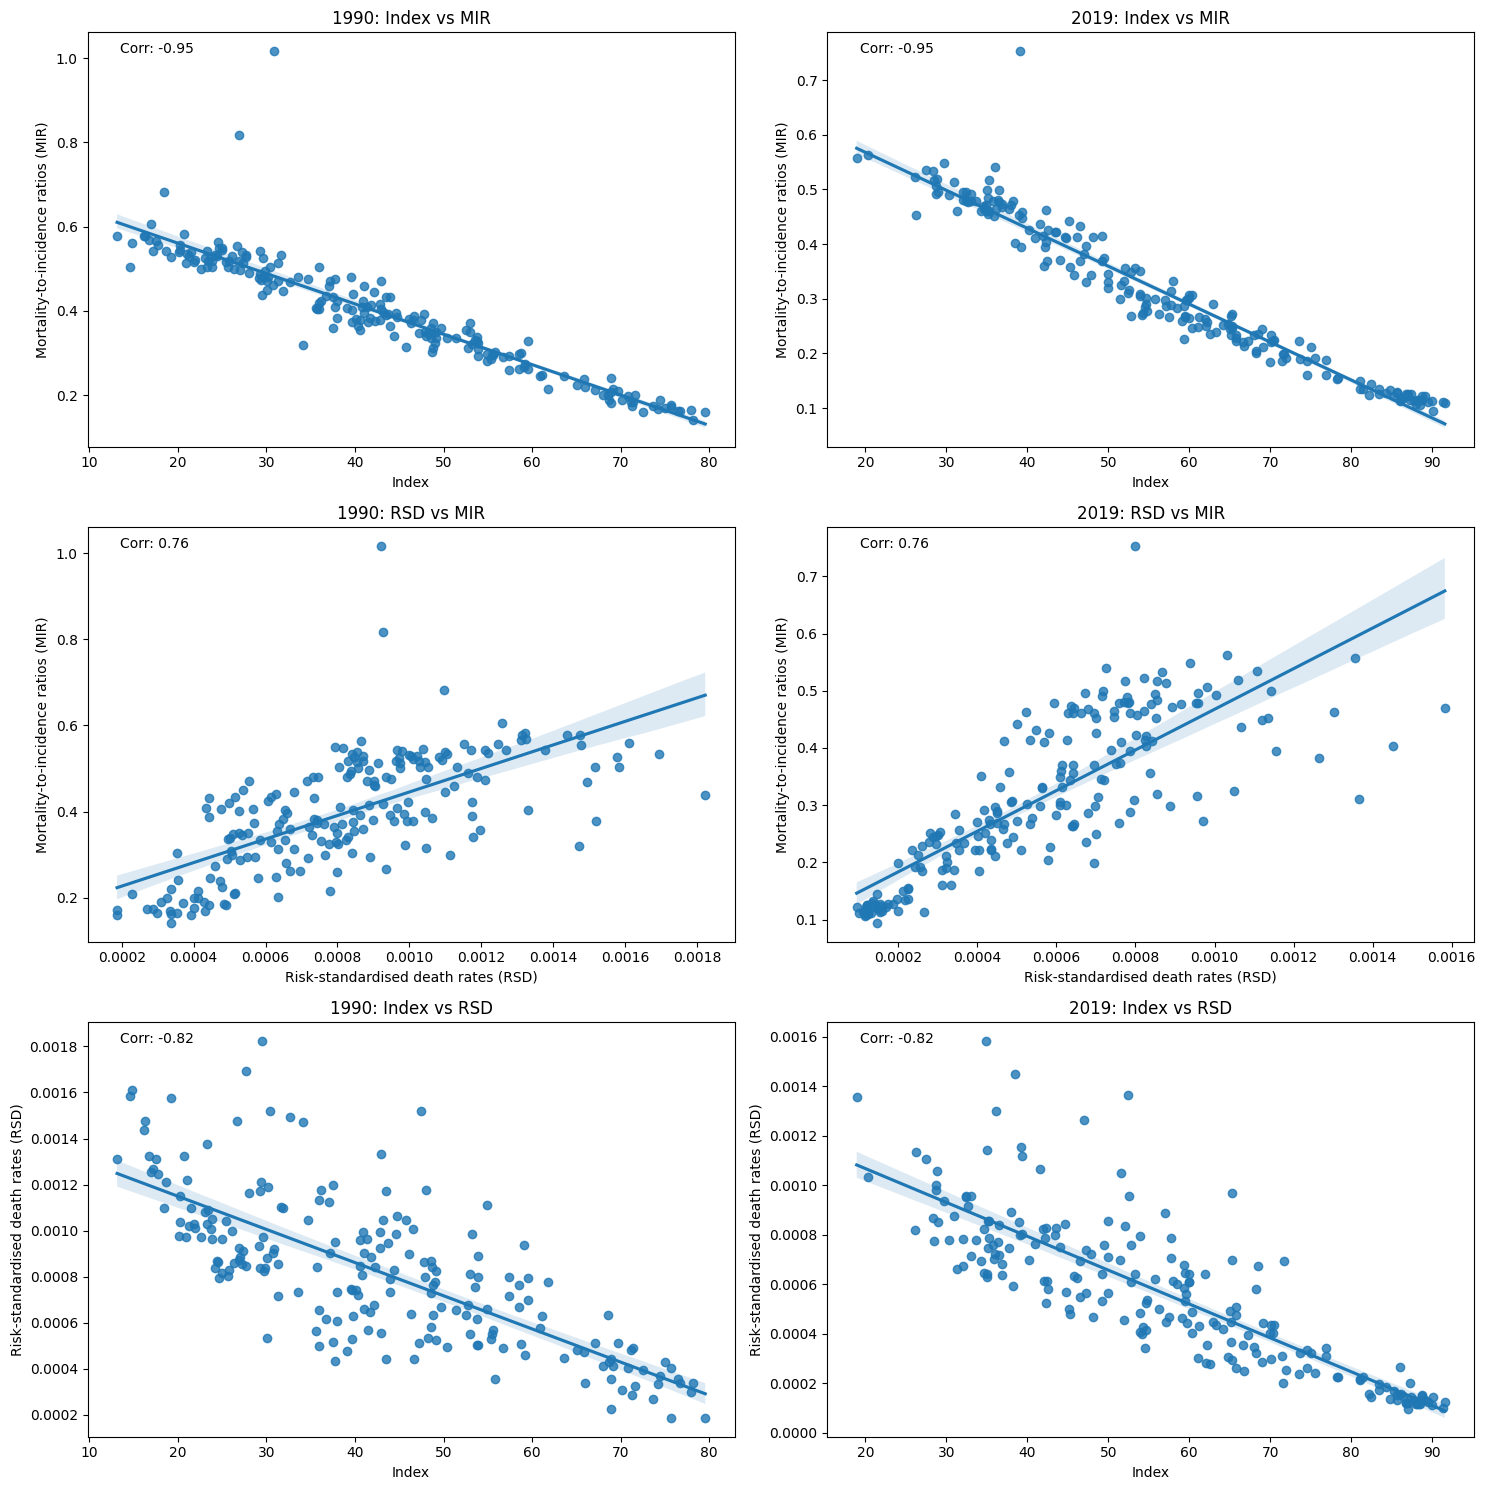

In [18]:
# Create subplots with three rows and two columns
num_rows = 3
num_cols = 2

# Set the figure size
plt.figure(figsize=(15, 15))

# Function to calculate correlation coefficient and display on plot
def annotate_corr(x, y, **kwargs):
    corr_coef = x.corr(y)
    text = f'Corr: {corr_coef:.2f}'
    ax = plt.gca()
    ax.annotate(text, xy=(0.05, 0.95), xycoords=ax.transAxes)

# Scatterplot 1: 'Index' vs 'Mortality-to-incidence ratios (MIR)' for 1990
plt.subplot(num_rows, num_cols, 1)
sns.regplot(x='Index', y='Mortality-to-incidence ratios (MIR)', data=pivoted_data3[pivoted_data3['year_id'] == 1990], ax=plt.gca())
annotate_corr(pivoted_data3['Index'], pivoted_data3['Mortality-to-incidence ratios (MIR)'])
plt.title('1990: Index vs MIR')
plt.xlabel('Index')
plt.ylabel('Mortality-to-incidence ratios (MIR)')

# Scatterplot 2: 'Index' vs 'Mortality-to-incidence ratios (MIR)' for 2019
plt.subplot(num_rows, num_cols, 2)
sns.regplot(x='Index', y='Mortality-to-incidence ratios (MIR)', data=pivoted_data3[pivoted_data3['year_id'] == 2019], ax=plt.gca())
annotate_corr(pivoted_data3['Index'], pivoted_data3['Mortality-to-incidence ratios (MIR)'])
plt.title('2019: Index vs MIR')
plt.xlabel('Index')
plt.ylabel('Mortality-to-incidence ratios (MIR)')

# Scatterplot 3: 'Risk-standardised death rates (RSD)' vs 'Mortality-to-incidence ratios (MIR)' for 1990
plt.subplot(num_rows, num_cols, 3)
sns.regplot(x='Risk-standardised death rates (RSD)', y='Mortality-to-incidence ratios (MIR)', data=pivoted_data3[pivoted_data3['year_id'] == 1990], ax=plt.gca())
annotate_corr(pivoted_data3['Risk-standardised death rates (RSD)'], pivoted_data3['Mortality-to-incidence ratios (MIR)'])
plt.title('1990: RSD vs MIR')
plt.xlabel('Risk-standardised death rates (RSD)')
plt.ylabel('Mortality-to-incidence ratios (MIR)')

# Scatterplot 4: 'Risk-standardised death rates (RSD)' vs 'Mortality-to-incidence ratios (MIR)' for 2019
plt.subplot(num_rows, num_cols, 4)
sns.regplot(x='Risk-standardised death rates (RSD)', y='Mortality-to-incidence ratios (MIR)', data=pivoted_data3[pivoted_data3['year_id'] == 2019], ax=plt.gca())
annotate_corr(pivoted_data3['Risk-standardised death rates (RSD)'], pivoted_data3['Mortality-to-incidence ratios (MIR)'])
plt.title('2019: RSD vs MIR')
plt.xlabel('Risk-standardised death rates (RSD)')
plt.ylabel('Mortality-to-incidence ratios (MIR)')

# Scatterplot 5: 'Index' vs 'Risk-standardised death rates (RSD)' for 1990
plt.subplot(num_rows, num_cols, 5)
sns.regplot(x='Index', y='Risk-standardised death rates (RSD)', data=pivoted_data3[pivoted_data3['year_id'] == 1990], ax=plt.gca())
annotate_corr(pivoted_data3['Index'], pivoted_data3['Risk-standardised death rates (RSD)'])
plt.title('1990: Index vs RSD')
plt.xlabel('Index')
plt.ylabel('Risk-standardised death rates (RSD)')

# Scatterplot 6: 'Index' vs 'Risk-standardised death rates (RSD)' for 2019
plt.subplot(num_rows, num_cols, 6)
sns.regplot(x='Index', y='Risk-standardised death rates (RSD)', data=pivoted_data3[pivoted_data3['year_id'] == 2019], ax=plt.gca())
annotate_corr(pivoted_data3['Index'], pivoted_data3['Risk-standardised death rates (RSD)'])
plt.title('2019: Index vs RSD')
plt.xlabel('Index')
plt.ylabel('Risk-standardised death rates (RSD)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [20]:
# Pivot the melted data to have each indicator as a separate column for each value type
pivoted_data = data.pivot_table(index=[ 'location_name', 'year_id','age_group_name'],
                                       columns='indicator_name', values='val',
                                aggfunc='mean').reset_index()
# Add latitude and longitude columns to the DataFrame
pivoted_data['latitude'], pivoted_data['longitude'] = zip(*pivoted_data['location_name'].apply(geocode_country))

In [21]:
# List of indicators
indicators = [
    'Adverse effects of medical treatment', 'Appendicitis', 'Breast cancer',
    'Cervical cancer', 'Chronic kidney disease', 'Chronic respiratory diseases',
    'Colon and rectum cancer', 'Congenital heart anomalies', 'Diabetes mellitus',
    'Diarrheal diseases', 'Diphtheria', 'Gallbladder and biliary diseases',
    'HAQ Index', 'Hodgkin lymphoma', 'Hypertensive heart disease',
    'Idiopathic epilepsy', 'Inguinal, femoral, and abdominal hernia',
    'Ischemic heart disease', 'Leukemia', 'Lower respiratory infections',
    'Maternal disorders', 'Measles', 'Neonatal disorders',
    'Non-melanoma skin cancer (squamous-cell carcinoma)', 'Peptic ulcer disease',
    'Rheumatic heart disease', 'Stroke', 'Testicular cancer', 'Tetanus',
    'Tuberculosis', 'Upper respiratory infections', 'Uterine cancer', 'Whooping cough'
]


# Sample layout
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    dcc.Dropdown(
        id='indicator-dropdown',
        options=[{'label': indicator, 'value': indicator} for indicator in indicators],
        value='Adverse effects of medical treatment',
        clearable=False
    ),
    dcc.Dropdown(
        id='year-dropdown',
        options=[
            {'label': 'All', 'value': 'All'},
            {'label': '1990', 'value': 1990},
            {'label': '2019', 'value': 2019}
        ],
        value='All',
        clearable=False
    ),
    dcc.Dropdown(
        id='age-group-dropdown',
        options=[
            {'label': 'Age-standardized', 'value': 'Age-standardized'},
            {'label': '0-14 years', 'value': '0-14 years'},
            {'label': '15-64 years', 'value': '15-64 years'},
            {'label': '65-74 years', 'value': '65-74 years'}
        ],
        value='Age-standardized',
        clearable=False
    ),
    dcc.Graph(id='map-plot')
])

# Define callback to update map plot
@app.callback(
    Output('map-plot', 'figure'),
    [Input('indicator-dropdown', 'value'),
     Input('year-dropdown', 'value'),
     Input('age-group-dropdown', 'value')]
)
def update_map_plot(indicator, year, age_group):
    filtered_data = pivoted_data.copy()

    if year != 'All':
        filtered_data = filtered_data[filtered_data['year_id'] == year]

    if age_group != 'All':
        filtered_data = filtered_data[filtered_data['age_group_name'] == age_group]

    fig = px.scatter_geo(filtered_data,
                         lat='latitude',
                         lon='longitude',
                         hover_name='location_name',
                         size=indicator,
                         projection='natural earth',
                         title=f'Map of {indicator} ({year if year != "All" else "All Years"}, {age_group if age_group != "All" else "All Age Groups"})')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>